# Visual analysis

## Importing libraries and data

In [39]:
from __future__ import division
from numpy import *
from operator import *
import matplotlib.pyplot as plt
from scipy import optimize, arange
from operator import add
#from openopt import GLP
#from mpmath import findroot
%matplotlib inline
import numpy as np
from statsmodels.sandbox.regression.gmm import IV2SLS
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
import sklearn

### Data

In [79]:
import pandas as pd
data = pd.read_csv('NEWAssignment3.csv')

In [80]:
data

,DOMAC,numberofchildren,age,health,WELLBEING,sex,age_2,twins,income,single,divorced,widowed,married,educ_grammar,educ_highschool,educ_uni,educ,female_children,female_twins
0,1100100491,2,37,2,9,0,1369,0,458285,0,0,0,1,1,0,0,0,0,0
1,1100100491,2,27,1,9,1,729,0,91200,0,0,0,1,0,0,1,2,2,0
2,1100101191,3,32,2,9,0,1024,0,400704,0,0,0,1,0,1,0,1,0,0
3,1100101191,3,35,1,7,1,1225,0,40800,0,0,0,1,0,0,1,2,3,0
4,1100101571,2,40,2,6,1,1600,0,241008,0,1,0,0,0,0,1,2,2,0
5,1100102191,1,33,0,0,0,1089,0,248489,0,0,0,1,1,0,0,0,0,0
6,1100102191,1,30,2,10,1,900,0,132241,0,0,0,1,0,1,0,1,1,0
7,1100102551,1,43,2,8,0,1849,0,424924,0,0,0,1,0,0,1,2,0,0
8,1100102551,1,41,2,8,1,1681,0,200635,0,0,0,1,0,1,0,1,1,0
9,1100102561,1,37,2,8,0,1369,0,276949,0,0,0,1,0,0,1,2,0,0


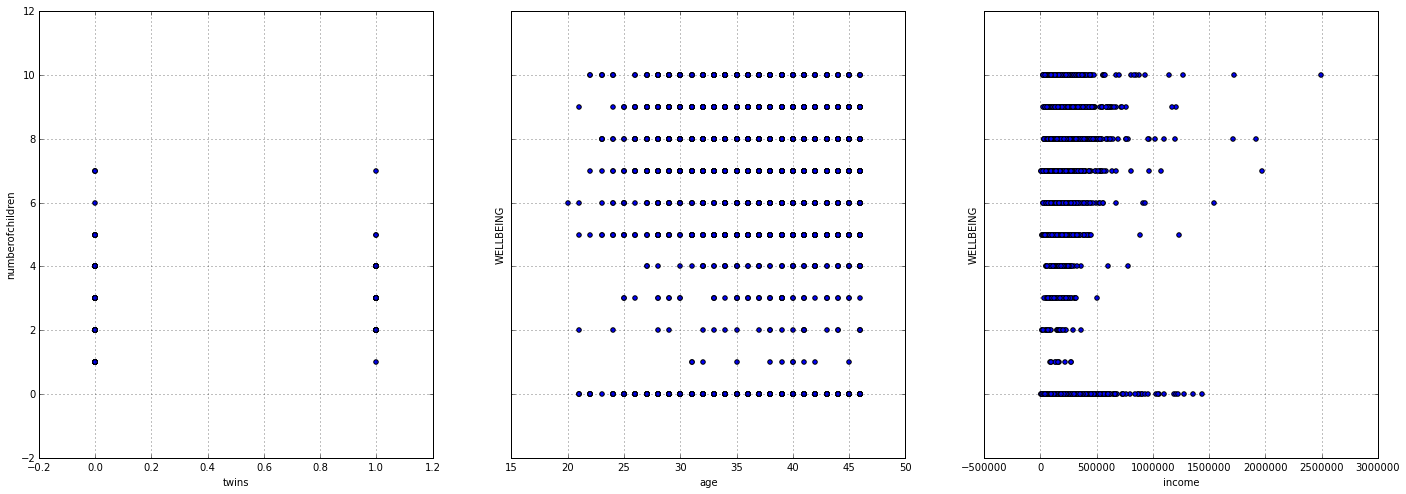

In [81]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data_df.plot(kind='scatter', x='twins', y='numberofchildren', ax=axs[0], figsize=(24, 8))
data_df.plot(kind='scatter', x='age', y='WELLBEING', ax=axs[1])
data_df.plot(kind='scatter', x='income', y='WELLBEING', ax=axs[2])

In [82]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='numberofchildren ~ twins', data=data).fit()

# print the coefficients
lm.params

Intercept    1.682903
twins        1.005170
dtype: float64

In [83]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'twins': [data.twins.min(), data.twins.max()]})
X_new.head()

,twins
0,0
1,1


In [85]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

array([ 1.68290323,  2.68807339])

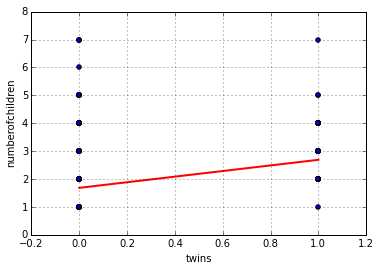

In [86]:
# first, plot the observed data
data.plot(kind='scatter', x='twins', y='numberofchildren')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)